# **Quantum Longest Common Substring**

Con il seguente elaborato, si affronta una soluzione ibrida classico-quantistica per la risoluzione del problema **Longest Common Substring**.

> Cantone, Domenico & Faro, Simone & Pavone, Arianna & Viola, Caterina. (2023). Longest Common Substring and Longest Palindromic Substring in $\tilde{\mathcal{O}}(\sqrt{n})$ Time. 10.48550/arXiv.2309.01250. 

## **Problema Longest Common Substring**

Il problema Longest Common Substring è un **problema di ottimizzazione** definito nel seguente modo:

> Date due stringhe $X = \{x_1, x_2, \dots, x_n\}$ e $Y = \{y_1, y_2, \dots, y_m\}$, trovare $S = \{s_1, s_2, \dots, s_k\}$ tale che $S$ sia sottostringa sia di $X$ che di $Y$, e massimizzando la lunghezza $k$. 

È un problema tipico del text processing, cui soluzioni trovano applicazioni nell'ambito della deduplicazione dei dati, negli algoritmi anti-plagio e nella bioinformatica (assieme al Longest Common Subsequence).

## **Quantum-LCS Algorithm**

L'algoritmo che si propone, è una soluzione ibrida classico-quantistica, che si compone di un algoritmo iterativo classico, e uno step di verifica quantistico.

```
QUANTUM-LCS(x,y,n):                    
    l = 0;                             
    r = n;                             
    while l < r do                     
        d = floor((l+r)/2)             
        if QUANTUM-TEST(x, y, d) then  
            l = d                      
        else                           
            r = d - 1                  
                                       
    return l                           
```

## **Algoritmo classico**

Tratteremo temporaneamente $\text{QUANTUM-TEST}(X, Y, d)$ come una black-box, ignorandone il funzionamento, ma solo il comportamento. Questa funzione ritorna `True` se e solo se 
$$\exists S \text{ sottostringa di } X \text{ e } Y \text{ di dimensione } d$$


Noto questo, l'algoritmo $\text{QUANTUM-LCS}(X,Y,n)$ si basa su una ricerca binaria del valore di $k$, verificando ad ogni step usando $\text{QUANTUM-TEST}(X,Y,d)$ come verifica. In altre parole:


> 1. Pongo $l = 0$ ed $r = n$. Questi coincidono col più ampio range di valori che la dimensione della LCS può assumere, ossia $0 \leq |S| \leq n$.
> 2. Stimo che la LCS tra $X$ e $Y$ sia di dimensione $d = \lfloor (l + r)/2\rfloor$.
> 3. Se esiste una sottostringa comune a $X$ e a $Y$ di dimensione $d$, pongo $l = d$, altrimenti pongo $r = d - 1$.
> 4. Se $l = r$, $l$ è la lunghezza della LCS ad $X$ e $Y$, altrimenti torno allo step $2$. 

Noto questo, è banale dire che la complessità della funzione, sarà:

$$
\mathcal{O}(\log n) \cdot (\text{Complessità di QUANTUM-TEST})
$$

## **Test quantistico**

Affrontiamo adesso l'analisi della componente quantistica dell'algoritmo. Abbiamo già detto che vogliamo che $\text{QUANTUM-TEST}(X,Y,d)$ torni `True` se e solo se esiste una sottostringa di dimensione $d$ condivisa tra $X$ e $Y$.

### **Prerequisiti di computazione quantistica**

Riassumiamo i prerequisiti di computazione quantistica (non triviali) richiesti per la comprensione della funzione $\text{QUANTUM-TEST}(X,Y,d)$.

- [Oracoli booleani](../q-miscellaneous/q-oracles/boolean-oracles.ipynb) - gate che implementano funzioni del tipo $f: \{0,1\}^n \to \{0,1\}$;
- [Phase kickback](../q-miscellaneous/q-oracles/phase-kickback.ipynb) - conseguenza dell'applicazione di operazioni controllate su qubit in sovrapposizione;
- [Oracoli di fase](../q-miscellaneous/q-oracles/phase-oracles.ipynb) - i quali uniscono le intuizioni degli oracoli booleani col phase kickback;
- Operatore di rotazione arbitraria;
- [Algoritmo di Grover](../Grover-algorithm/grover.ipynb) - per amplificare la probabilità di ottenere stati che soddisfano le condizioni di un oracolo di fase.

### **Idea dietro il test quantistico**

Come tutti i problemi risolti tramite l'algoritmo di Grover, vogliamo costruire degli oracoli di fase $P_f$ per invertire la fase delle soluzioni che cerchiamo. Lo step di diffusione, farà invece da ponte tra la verifica di una soluzione e la sua costruzione effettiva.

Ricordiamo che col nostro $\text{QUANTUM-TEST}$ vogliamo porre la seguente domanda:

$$
\text{Esiste una sottostringa di dimensione $d$ comune a $X$ e $Y$?}
$$
Introduciamo quindi gli oracoli necessari per il test.

- $\text{SFC}$: Shared Fix Substring Check
- $\text{FPM}$: Fixed Prefix Matching

costruiti entrambi come variazioni dell'operatore $\text{Fixed Substring Matching}$, o $\text{FSM}$, nel quale è possibile specificare la posizione di partenza della sottostringa (tramite $|D[-1]\rangle$), e la sua dimensione (tramite $|d\rangle$).

## **Operatore FSM**

> Cantone, D., Faro, S., Pavone, A., Viola, C. (2024). Quantum Circuits for Fixed Matching Substring Problems. In: Arai, K. (eds) Intelligent Computing. SAI 2024. Lecture Notes in Networks and Systems, vol 1018. Springer, Cham. https://doi.org/10.1007/978-3-031-62269-4_43

L'operatore Fixed Substring Matching implementa la seguente $f$:

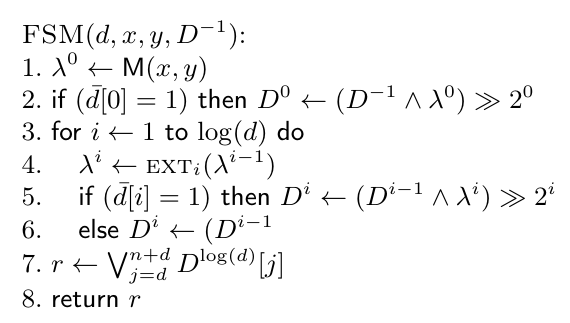

In cui 
- Ogni vettore $\lambda$ è detto di *matching substring*, ed è definito ricorsivamente come

$$
\lambda^{i}[j] = \lambda^{i-1}[j] \land \lambda^{i-1}[j + 2^{i-1}] \qquad 
\lambda^{0}[j] = (x_j \land y_j) \lor (\neg x_j \land \neg y_j)
$$

- Ogni vettore $D$ è definito ricorsivamente (a meno di $D^{-1}$, stabilito in funzione del problema di string matching) come
$$
D^i = (D^{i-1} \land \lambda^{i-1}) \gg 2^i \text{ se } \overline{d}[i]=1 \qquad \text{altrimenti} \quad D^i = D^{i-1}
$$


1. Costruisco il vettore di *matching substring* $\lambda^0$ contenendo le posizioni in cui i caratteri di $X,Y$ coincidono.
2. Costruisco il vettore $D^0$. In generale, se $D^i[j+\overline{d}[0:i]] = 1$, sappiamo che in quella posizione c'è una sottostringa di lunghezza $d$ comune a $X$ e $Y$.
3. Costruisco, per $i = 0, 1, \dots, \log n$ i vari vettori $\lambda^i$ e $D^i$.
4. Ritorno l'$\text{OR}$ logico tra tutte le linee di $D^{\log(d)}$ (l'ultimo vettore).

In particolare, l'inizializzazione di $D^{-1}$ dipende esclusivamente dal tipo di problema che si sta affrontando ($\text{SFC},\text{FPM}$).

## **Costruire il circuito dell'operatore SFC**

L'operatore in questione è costruito usando i seguenti operatori ausiliari:

- $\text{MATCH}$
- $\text{EXT}_i$
- $\text{ROT}$ e operatori di rotazione $\text{R}_i$
- $\text{C-AND}$
- $\text{C-COPY}$
- $\text{OR}$

In [117]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from BoredQiskit.FastUtilsGate import int_to_bin
import numpy as np

### **Operatore di match**

Confronta due sequenze binarie di lunghezza $n$, scrivendo su delle linee d'output di dimensione $n$. Ha profondità costante $\mathcal{O}(1)$. Viene utilizzato per costruire il vettore $\lambda^0$.

$$
\lambda^{0}[j] = (x_j \land y_j) \lor (\neg x_j \land \neg y_j).
$$

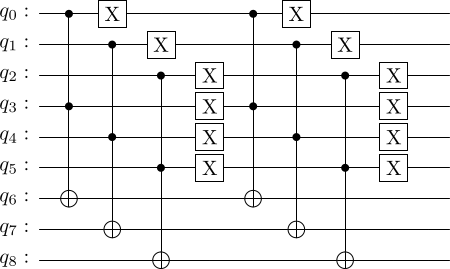

In [118]:
def match_operator(n: int):
    '''
    page 12 of the paper
    '''
    qx = QuantumRegister(n, 'x')
    qy = QuantumRegister(n, 'y')
    qout = QuantumRegister(n, 'o')
    qc = QuantumCircuit(qx, qy, qout)
    
    for i in range(n):
        qc.ccx(qx[i], qy[i], qout[i])

    qc.x(qx)
    qc.x(qy)

    for i in range(n):
        qc.ccx(qx[i], qy[i], qout[i])
    
    qc.x(qx)
    qc.x(qy)
    
    return qc.to_gate(label='MATCH')

qc = QuantumCircuit(9)
qc = qc.compose(match_operator(3)).decompose()
qc.draw('latex')

### **Operatore di estensione**

Costruisce il vettore di *matching substring* $\lambda^i$ partendo dal vettore $\lambda^{i-1}$. Ogni vettore $\lambda^i$ contiene $1$ nelle posizioni che coincidono con l'inizio di una sottostringa di lunghezza $2^i$.

Ogni vettore $\lambda$ è definito come

$$
\lambda^{i}[j] = \lambda^{i-1}[j] \land \lambda^{i-1}[j + 2^{i-1}]
$$

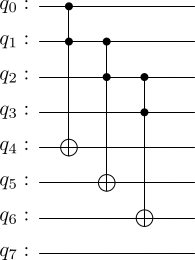

In [119]:
def extension_operator(n: int, i: int):
    '''
    page 12 of the paper
    '''
    shift = 2 ** (i - 1)

    qin = QuantumRegister(n, 'in')    
    qout = QuantumRegister(n, 'out')
    qc = QuantumCircuit(qin, qout)

    for j in range(n - shift):
        qc.ccx(qin[j], qin[j + shift], qout[j])

    return qc.to_gate(label=f'EXT_{i}')

qc = QuantumCircuit(8)
qc = qc.compose(extension_operator(4,1)).decompose()
qc.draw('latex')

### **Operatori di rotazione**

Fondamentali nel contesto degli algoritmi di ricerca su stringhe basati su Grover.

In [120]:
def quantum_rotation(n: int, s: int):
    '''
    Returns a `.Gate` that implements a rotation
    of `s` positions on `n` qubits lines.
    
    Only works correctly if `s` is a power of 2. Every other
    rotation can be obtained by combination of the power of 2 rotations
    '''
    qr = QuantumRegister(n, 'q')
    qc = QuantumCircuit(qr)
    
    for i in range(1, int(np.ceil(n/2))):
        qc.swap(qr[i], qr[n-i])
    
    for j in range(1, int(np.ceil(n/2))):
        qc.swap(qr[int(np.ceil(s/2))-j], qr[int(np.floor(s/2))+j])

    return qc.to_gate(label='R_'+str(s)+' ')


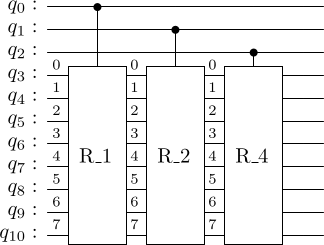

In [121]:
def quantum_parametric_rotation(n: int):
    '''
    Returns an arbitrary rotation `.Gate` on `n` qubits lines.

    page 9 of the paper
    '''
    l = int(np.ceil(np.log2(n)))

    jr = QuantumRegister(l, 'j')
    qr = QuantumRegister(n, 'q')

    qc = QuantumCircuit(jr, qr)
    for i in range(l):
        
        qc = qc.compose(quantum_rotation(n, 2**i).control(1), [i,*qr])
    return qc

qc = QuantumCircuit(11)
qc = qc.compose(quantum_parametric_rotation(8))
qc.draw('latex')


### **Operatore di "copia"**

Con "copia", ci riferiamo alla copia di stati base $|0\rangle$ e $|1\rangle$, nel totale rispetto (a malincuore?) del teorema di non-clonazione. Lo renderemo un operatore controllato tramite il metodo `.control(int)` offerto da Qiskit.

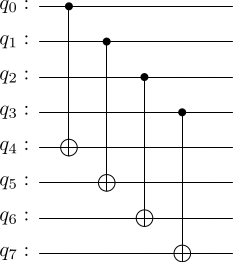

In [122]:
def copy_operator(n: int):
    '''
    page 13 of the paper
    '''
    qin = QuantumRegister(n, 'in')
    qout = QuantumRegister(n, 'out')
    qc = QuantumCircuit(qin, qout)

    for i in range(n):
        qc.cx(qin[i], qout[i])
    
    
    return qc.to_gate(label='COPY')


qc = QuantumCircuit(8)
qc = qc.compose(copy_operator(4)).decompose()
qc.draw('latex')

### **Operatore OR logico**

Necessario per verificare se l'ultimo array $D[i]_j$ contiene almeno un elemento $=1$.

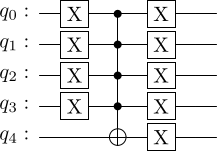

In [123]:
def or_operator(n: int):
    '''
    page 15 of the paper
    '''
    qx = QuantumRegister(n, 'x')
    qy = QuantumRegister(1, 'y')
    qc = QuantumCircuit(qx, qy)
    
    qc.x(qx)
    qc.mcx(qx, qy)
    qc.x(qx)
    qc.x(qy)

    return qc.to_gate(label='OR')

qc = QuantumCircuit(5)
qc = qc.compose(or_operator(4)).decompose()
qc.draw('latex')

### **Operatore AND logico bit-a-bit controllato**

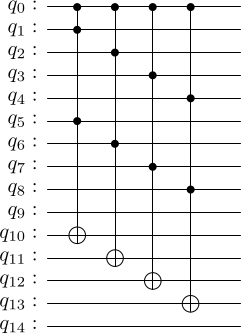

In [124]:
def contr_bitwise_and_operator(n: int):
    '''
    page 13 of the paper
    '''
    qc_ctrl = QuantumRegister(1, 'c')
    qL = QuantumRegister(n, 'L')
    qin = QuantumRegister(n+1, 'qin')
    qout  = QuantumRegister(n+1, 'qout')
    qc = QuantumCircuit(qc_ctrl, qL, qin, qout)

    for k in range(n):
        qc.mcx([qc_ctrl[0], qL[k], qin[k]], qout[k])

    return qc.to_gate(label="C-AND")


qc = QuantumCircuit(15)
qc = qc.compose(contr_bitwise_and_operator(4)).decompose()
qc.draw('latex')

### **Operatore FSM completo**

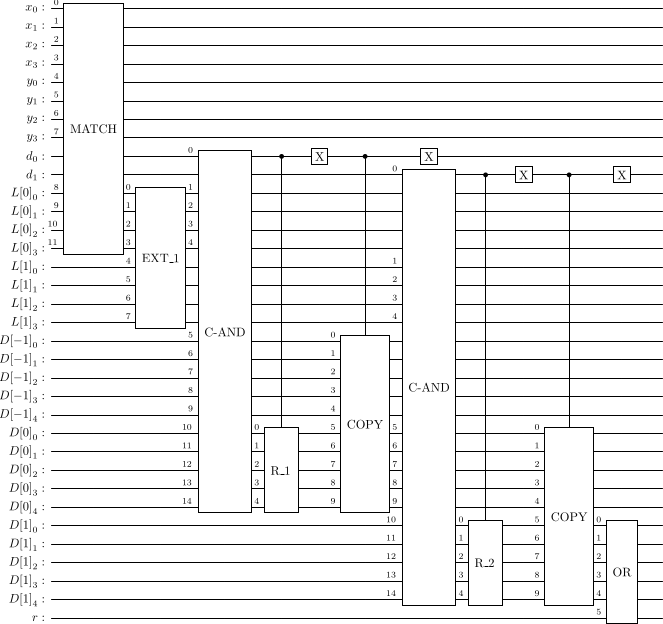

In [131]:
def FSM(n):
    '''
    builds the Fixed Substring Matching operator for inputs of size `n`
    '''
    
    d_len = int(np.ceil(np.log2(n)))
    L_num = d_len
    qx = QuantumRegister(n, 'x')
    qy = QuantumRegister(n, 'y')
    qd = QuantumRegister(d_len, 'd')
    qD = QuantumRegister(d_len+1, 'D')
    qL = []

    for i in range(L_num): # padding
        qL.append(QuantumRegister(n, 'L['+str(i)+']'))
    
    qD = []
    for i in range(d_len+1):
        qD.append(QuantumRegister(n+1, 'D['+str(i-1)+']'))
    
    qr = QuantumRegister(1, 'r')
    qc = QuantumCircuit(qx,qy,qd,*qL,*qD,qr)
    

    qc = qc.compose(match_operator(n), [*qx, *qy, *qL[0]])
    
    for i in range(L_num-1):
        qc = qc.compose(extension_operator(n, i+1), [*qL[i][:n], *qL[i+1]])
    
    for i in range(d_len):
        
        qc = qc.compose(contr_bitwise_and_operator(n), [qd[i], *qL[i], *qD[i], *qD[i+1]])
        
        controlled_rot = quantum_rotation(n+1, 2**i).control(1)
        qc = qc.compose(controlled_rot, [qd[i], *qD[i+1]])
        qc.x(qd[i])
        controlled_copy = copy_operator(n+1).control(1)
        qc = qc.compose(controlled_copy, [qd[i],*qD[i], *qD[i+1]])
        qc.x(qd[i])

    qc = qc.compose(or_operator(n+1), [*qD[d_len], qr])

    return qc

qc = FSM(4)
qc.draw('latex', scale=0.6)


Da questo operatore, andiamo a creare i precedentemente citati $\text{FPM}$ e $\text{SFC}$. 
Il primo nasce ponendo $D[-1]_0 = 1$ (che nel paper è $D^{-1}_0$). Questo, impone che la sottostringa comune di dimensione $d$ sia il prefisso.
Il secondo, invece, generalizza l'inizio della sottostringa comune a qualsiasi indice $j$.


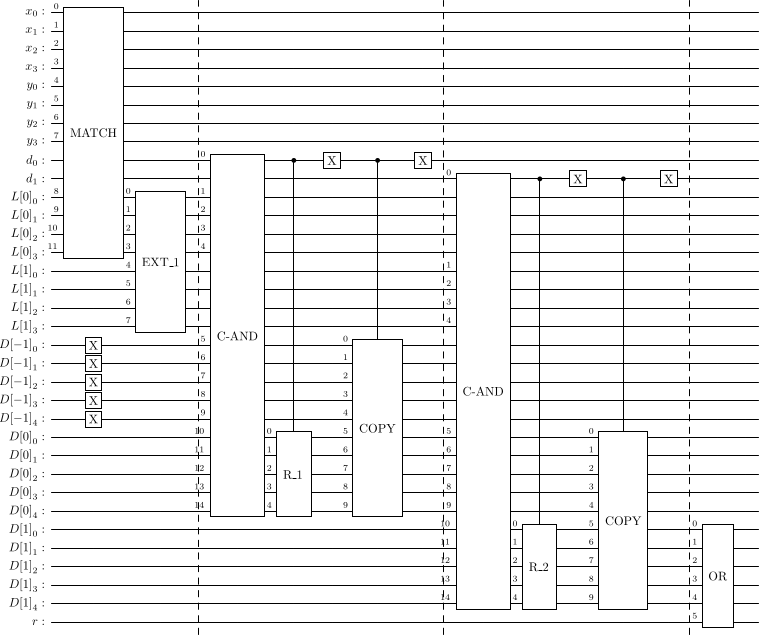

In [126]:
def SFC(n):
    '''
    builds the Shared Fix Substring Check operator for inputs of size `n`
    '''
    d_len = int(np.ceil(np.log2(n)))
    L_num = d_len
    qx = QuantumRegister(n, 'x')
    qy = QuantumRegister(n, 'y')
    qd = QuantumRegister(d_len, 'd')
    qD = QuantumRegister(d_len+1, 'D')
    qL = []

    for i in range(L_num): # padding
        qL.append(QuantumRegister(n, 'L['+str(i)+']'))
    
    qD = []
    for i in range(d_len+1):
        qD.append(QuantumRegister(n+1, 'D['+str(i-1)+']'))
    
    qr = QuantumRegister(1, 'r')
    qc = QuantumCircuit(qx,qy,qd,*qL,*qD,qr)
    
    qc.x(qD[0])

    qc = qc.compose(FSM(n))
    return qc

qc = SFC(4)
qc.draw('latex', scale=0.6)

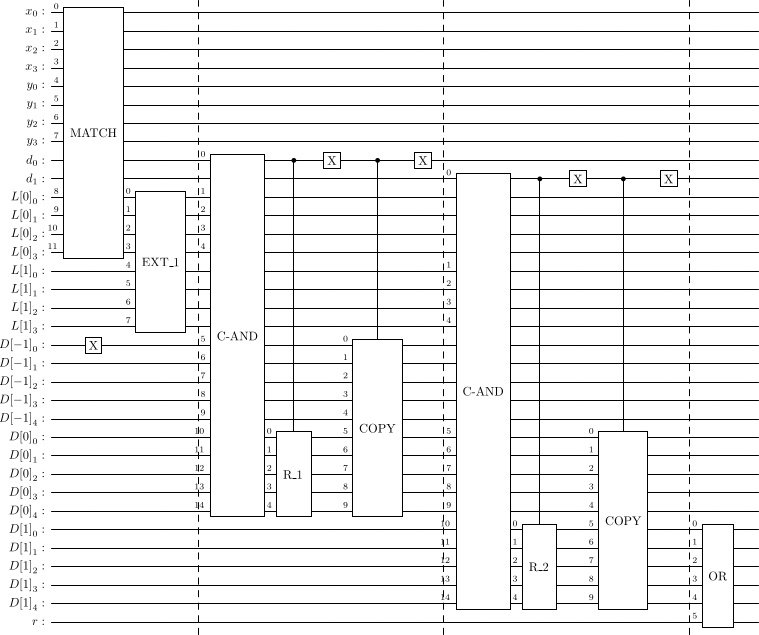

In [127]:
def FPM(n):
    '''
    builds the Fixed Prefix Matching operator for inputs of size `n`
    '''

    d_len = int(np.ceil(np.log2(n)))
    L_num = d_len
    qx = QuantumRegister(n, 'x')
    qy = QuantumRegister(n, 'y')
    qd = QuantumRegister(d_len, 'd')
    qD = QuantumRegister(d_len+1, 'D')
    qL = []

    for i in range(L_num): # padding
        qL.append(QuantumRegister(n, 'L['+str(i)+']'))
    
    qD = []
    for i in range(d_len+1):
        qD.append(QuantumRegister(n+1, 'D['+str(i-1)+']'))
    
    qr = QuantumRegister(1, 'r')
    qc = QuantumCircuit(qx,qy,qd,*qL,*qD,qr)
    
    # init
    qc.x(qD[0][0])
    
    qc = qc.compose(FSM(n))
    return qc

qc = FPM(4)
qc.draw('latex', scale=0.6)

## **Costruiamo il test quantistico**

In [ ]:
def grover_operator(n: int):
    '''
    builds the diffusion operator from the grover algorithm
    '''
    qx = QuantumRegister(n, 'x')
    qc = QuantumCircuit(qx)
    
    qc.h(qx)
    qc.x(qx)
    qc.h(qx[n-1])
    qc.mcx(qx[list(range(n-1))], qx[n-1])
    qc.h(qx[n-1])
    qc.x(qx)
    qc.h(qx)

    return qc.to_gate(label='DIFFUSION')


def quantum_number_encode(num: int, code_len: int=0):
    """
    encodes the given `num` into a quantum circuit. if specified, `code_len` lets
    you use more qubits than needed for the number specified by `num`
    """
    if num == 0:
        return QuantumCircuit(code_len).to_gate(label=" 0 ")
        
    if code_len < int(np.ceil(np.log2(num))):
        code_len = bin_num
    bin_num = int_to_bin(num, code_len)
    qc = QuantumCircuit(code_len)
    for c, i in enumerate(bin_num):
        if i == '1':
            qc.x(code_len-1-c)
    return qc.to_gate(label=" "+str(num)+" ")


def encode_boolean_string(x: str):
    n = len(x)
    qx = QuantumRegister(n, 'x')
    qc = QuantumCircuit(qx)

    for c, i in enumerate(x):
        if i == '1':
            qc.x(qx[n - c - 1])
    
    return qc

Il test quantistico si compone quindi di tre fasi:
- $\text{SEARCH PHASE}$: «Esiste qualche posizione $i$ in cui c'è un match di lunghezza $d?$». In questo modo viene fissata la rotazione della stringa $X$ rispetto al match.
- $\text{VERIFICATION PHASE}$: «Ruotate in maniera opportuna, le stringhe matchano partendo dalla posizione 0?». In questo modo viene fissata la rotazione della stringa $Y$.
- $\text{FINAL CHECK}$: viene verificata la condizione tramite oracolo booleano. In questo modo, non è possibile avere falsi positivi. I falsi negativi vengono mitigati aumentando il numero di esecuzioni, in quanto basta anche solo un'esecuzione con output 1 per rendere il test valido.

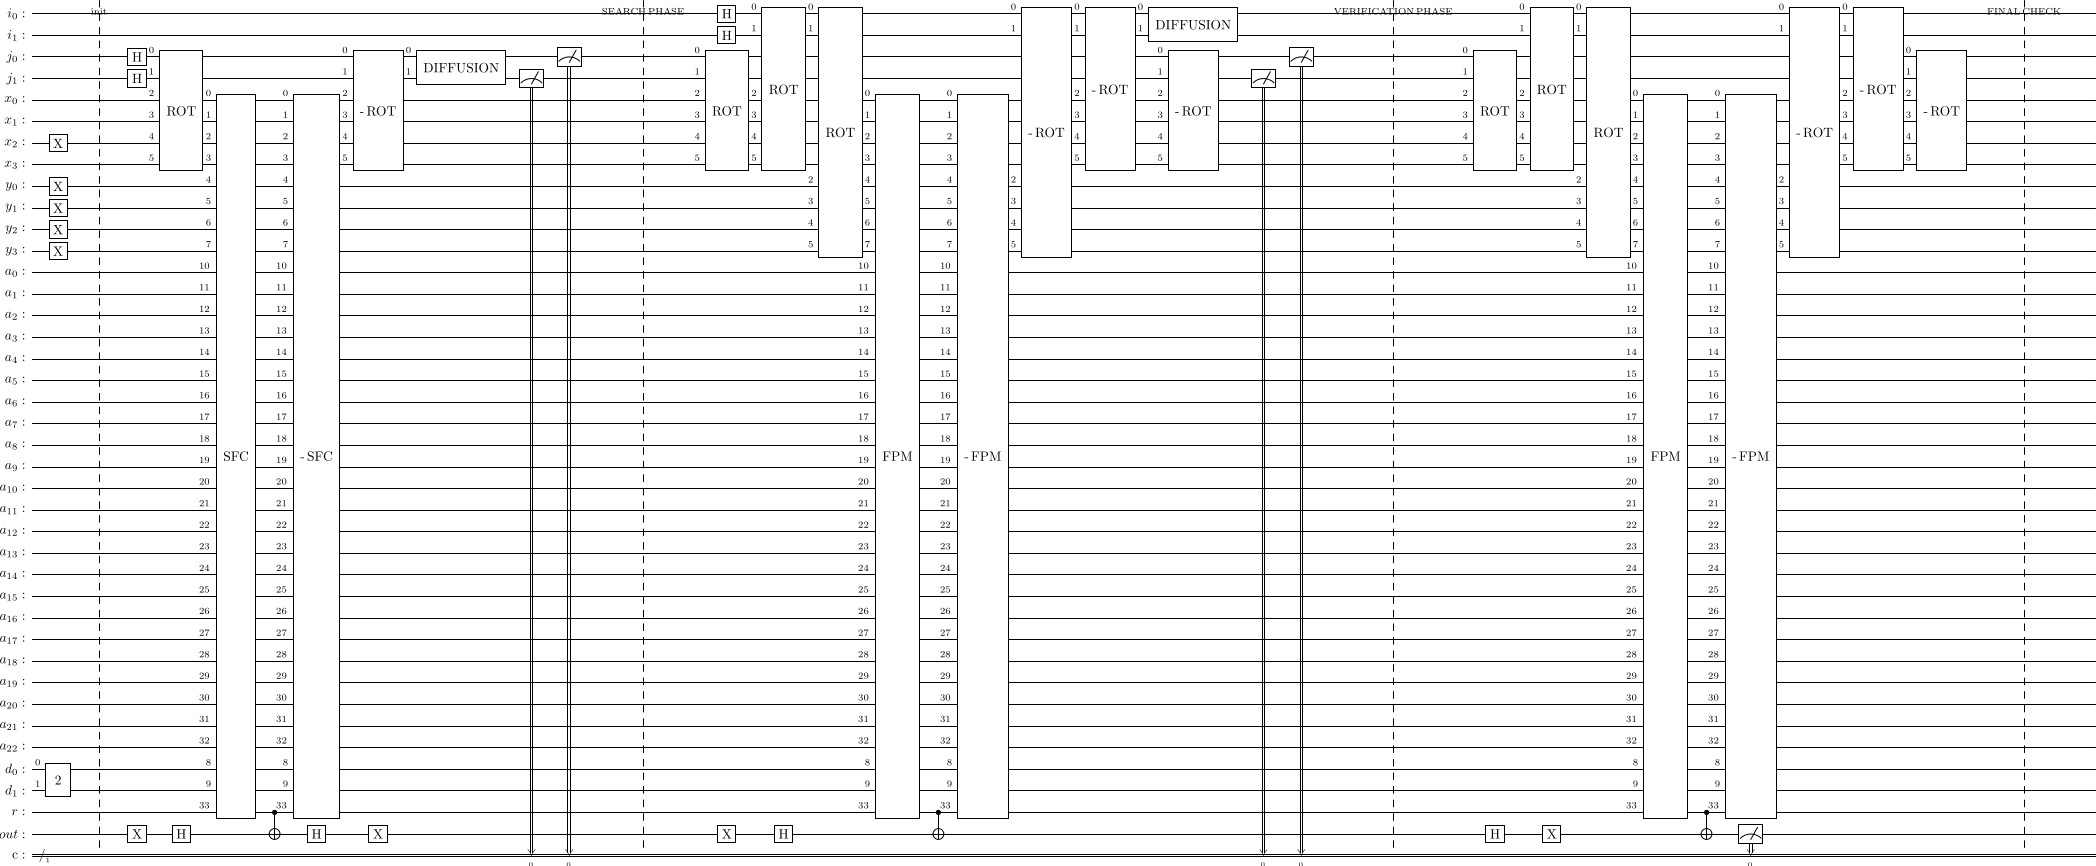

In [132]:
def quantum_step_circuit(n: int, d: int, x: str, y: str):

    qi_amount = int(np.ceil(np.log2(n)))
    qi = QuantumRegister(qi_amount, 'i')
    qj = QuantumRegister(qi_amount, 'j')
    qx = QuantumRegister(n, 'x')
    qy = QuantumRegister(n, 'y')
    ancilla_amount = n * int(np.ceil(np.log2(n))) + (n+1)*(int(np.ceil(np.log2(n+1))))
    qa = QuantumRegister(ancilla_amount, 'a')
    qd = QuantumRegister(qi_amount, 'd')
    qr = QuantumRegister(1, 'r')
    qo = QuantumRegister(1, 'out')

    c = ClassicalRegister(1,'c')
    qc = QuantumCircuit(qi,qj,qx,qy,qa,qd,qr,qo, c)

    qc = qc.compose(quantum_number_encode(d,qi_amount), qd)
    qc = qc.compose(encode_boolean_string(x), qx)
    qc = qc.compose(encode_boolean_string(y), qy)
    qc.barrier(label='init')
    
    # search phase
    qc.h(qj)
    qc.x(qo)
    qc.h(qo)
    
    epochs = int(np.floor(np.pi/4 * np.sqrt(n)))
    
    for e in range(epochs):
        qc = qc.compose(quantum_parametric_rotation(n).to_gate(label='ROT'), [*qj,*qx])
        qc = qc.compose(SFC(n).to_gate(label='SFC'), [*qx, *qy, *qd, *qa, qr])

        qc.cx(qr, qo)
        qc = qc.compose(SFC(n).inverse().to_gate(label='- SFC'), [*qx, *qy, *qd, *qa, qr])
        qc = qc.compose(quantum_parametric_rotation(n).inverse().to_gate(label='- ROT'), [*qj,*qx])

        qc = qc.compose(grover_operator(qi_amount), qj)

    qc.measure(qj[1], c)
    qc.measure(qj[0], c)
    qc.h(qo)
    qc.x(qo)
    qc.barrier(label='SEARCH PHASE')

    qc.h(qi)

    # verification phase
    qc.x(qo)
    qc.h(qo)
    for e in range(epochs):
        qc = qc.compose(quantum_parametric_rotation(n).to_gate(label='ROT'), [*qj,*qx])
        qc = qc.compose(quantum_parametric_rotation(n).to_gate(label='ROT'), [*qi,*qx])
        qc = qc.compose(quantum_parametric_rotation(n).to_gate(label='ROT'), [*qi,*qy])
        qc = qc.compose(FPM(n).to_gate(label='FPM'), [*qx, *qy, *qd, *qa, qr])

        qc.cx(qr, qo)
        qc = qc.compose(FPM(n).inverse().to_gate(label='- FPM'), [*qx, *qy, *qd, *qa, qr])
        qc = qc.compose(quantum_parametric_rotation(n).inverse().to_gate(label='- ROT'), [*qi,*qy])
        qc = qc.compose(quantum_parametric_rotation(n).inverse().to_gate(label='- ROT'), [*qi,*qx])
        qc = qc.compose(quantum_parametric_rotation(n).inverse().to_gate(label='- ROT'), [*qj,*qx])

        qc = qc.compose(grover_operator(qi_amount), qi)

    qc.measure(qj[1], c)
    qc.measure(qj[0], c)
    qc.barrier(label='VERIFICATION PHASE')

    # final check
    qc.h(qo)
    qc.x(qo)
    
    for e in range(epochs):
        qc = qc.compose(quantum_parametric_rotation(n).to_gate(label='ROT'), [*qj,*qx])
        qc = qc.compose(quantum_parametric_rotation(n).to_gate(label='ROT'), [*qi,*qx])
        qc = qc.compose(quantum_parametric_rotation(n).to_gate(label='ROT'), [*qi,*qy])
        qc = qc.compose(FPM(n).to_gate(label='FPM'), [*qx, *qy, *qd, *qa, qr])

        qc.cx(qr, qo)
        qc = qc.compose(FPM(n).inverse().to_gate(label='- FPM'), [*qx, *qy, *qd, *qa, qr])
        qc = qc.compose(quantum_parametric_rotation(n).inverse().to_gate(label='- ROT'), [*qi,*qy])
        qc = qc.compose(quantum_parametric_rotation(n).inverse().to_gate(label='- ROT'), [*qi,*qx])
        qc = qc.compose(quantum_parametric_rotation(n).inverse().to_gate(label='- ROT'), [*qj,*qx])

    qc.measure(qo, c)
    qc.barrier(label='FINAL CHECK')

    return qc  

quantum_step_circuit(4, 2, '0100', '1111').draw('latex', scale=0.65)

Con l'aggiunta dell'oracolo alla fine del circuito, è garantito che, se l'algoritmo ritorna anche in un solo shot il valore "1", allora esiste una sottostringa di dimensione $d$ comune a $X$ e $Y$.

Chiaramente, l'utilizzo del gate di diffusione dell'algoritmo di Grover, massimizza la probabilità di ottenere una sottostringa valida (se esiste), e di ritornare 1, quando la condizione è rispettata.

Noto questo, strutturiamo il test, basandoci proprio sul risultato delle misurazioni.

### **Quantum Test - Esecuzione**


A causa dell'altissimo numero di ancilla qubit, è necessario utilizzare una simulazione ottimale. Utilizziamo quindi il metodo del `'matrix_product_state'`, imponendolo nel costruttore dell'`AerSimulator`. Questo metodo di simulazione non permette di descrivere con alta precisione sistemi ad alto entanglement, ma non essendo questo il caso del nostro circuito, possiamo utilizzarlo.

In [ ]:
def run(qc, shots=1024):
    """
    ritorna i risultati dell'esecuzione del `qc` `QuantumCircuit` nel simulatore ideale AerSimulator. 
    `shots` permette di specificare il numero di esecuzioni da compiere.
    """
    sim_backend = AerSimulator(method='matrix_product_state')
    
    pm = generate_preset_pass_manager(backend=sim_backend, optimization_level=2)
    isa_qc = pm.run(qc)
    sampler = Sampler(mode=sim_backend)

    job = sampler.run([isa_qc], shots=shots)
    results = job.result()
    data = results[0].data
    counts = data.c.get_counts()

    return counts

### **Quantum Test**

In [ ]:
def quantum_LCS_test(n: int, d: int, x: str, y: str):
    
    if d == 0: # esiste sempre una sottostringa comune di dimensione 0
        return True 

    qc = quantum_step_circuit(n, d, x, y)
    qc.draw('mpl')
    c = run(qc, 20)
    
    if '1' in list(c.keys()):
        return True
    else:
        return False


## **Algoritmo finale**

In [ ]:
def quantum_LCS(x: str, y: str, n: int, verbose=False):
    l = 0
    r = n
    last = n
    while l < r:
        d = int(np.floor((l + r) / 2 ))
        if d == last:
            return l
        
        if verbose:
            print(f"testing for common substring of length {d}:", end=" ")

        if quantum_LCS_test(n, d, x, y):
            l = d
            if verbose: print("found!")
        else:
            r = d
            if verbose: print("not found!")
        last = d
    return l


In [ ]:
X = '1111' 
Y = '0000'

print(quantum_LCS(X, Y, len(X), True))

testing for common substring of length 2: not found!
testing for common substring of length 1: not found!
testing for common substring of length 0: found!
0


In [ ]:
X = '0111' 
Y = '0011'

print(quantum_LCS(X, Y, len(X), True))

testing for common substring of length 2: found!
testing for common substring of length 3: found!
3


In [ ]:
X = '0001' 
Y = '0011'

print(quantum_LCS(X, Y, len(X), True))

testing for common substring of length 2: found!
testing for common substring of length 3: found!
3


In [ ]:
X = '1111'
Y = '0100' 

print(quantum_LCS(X, Y, len(X), True))

testing for common substring of length 2: not found!
testing for common substring of length 1: found!
1


In [ ]:
X = '1111' 
Y = '0001'

print(quantum_LCS(X, Y, len(X), True))

testing for common substring of length 2: not found!
testing for common substring of length 1: found!
1


## **Analisi del circuito**

### **Numero di ancilla qubit**

Il numero di ancilla qubit richiesti dal circuito, in funzione della lunghezza delle stringhe $X$ e $Y$ pari a $n$, è:

$$
\text{ancilla amount} = \underbrace{n\cdot \log(n)}_{\lambda \text{ di dimensione }n}  + \underbrace{(n+1)(\log(n)+1)}_{D \text{ di dimensione }n+1} = \mathcal{O}(n\log(n))
$$

In realtà, l'array $\lambda$ decresce di dimensione in maniera esponenziale: tuttavia, lavorare su linee di dimensione uguale, risulta essere molto più semplice per l'implementazione.

## **Limitazioni tecniche**

La formulazione originale del problema impone che le stringhe $X$ e $Y$ (senza perdita di generalità) siano concluse da dei caratteri di terminazione (disgiunti tra le due stringhe, ossia `$` e `%`) posti in modo da raggiungere lunghezza pari alla potenza del 2 più vicina. Seppur non facendo (formalmente parlando) parte dell'alfabeto $\Sigma$ dei caratteri che compongono le stringhe, questi richiederebbero comunque un modo per essere codificati all'interno del circuito, forzando quindi ad un'implementazione con almeno 2 qubit per carattere (al minimo, $\Sigma_\text{effettivo} = \{ 0, 1, \$, \% \} = \{00,01,10,11\}$).

Implementare i circuiti per il problema con $|\Sigma| > 2$ risulta molto difficile e impossibile da simulare. Ai fini della realizzazione del progetto, si è quindi omessa la presenza di questi caratteri di terminazione, a discapito di alcune anomalie causate dalla loro assenza. Ne riportiamo in seguito un paio: 

In [ ]:
X = '1011' 
Y = '0001'

print(quantum_LCS(X, Y, len(X), True)) 

testing for common substring of length 2: not found!
testing for common substring of length 1: not found!
testing for common substring of length 0: found!
0


In [ ]:
X = '1011' 
Y = '1111'

print(quantum_LCS(X, Y, len(X), True))

testing for common substring of length 2: found!
testing for common substring of length 3: found!
3


In [ ]:
X = '1111' 
Y = '1111'

print(quantum_LCS(X, Y, len(X), True)) # dovuto al numero di linee d pari al log(n). implementare un controllo per capire se le stringhe sono uguali risulta una buona soluzione.

testing for common substring of length 2: found!
testing for common substring of length 3: found!
3


Osserviamo anche che il primo e il secondo esempio di anomalie sono causati dalle rotazioni delle stringhe, che rendono la stringa $X$ equivalente a qualsiasi sua permutazione di rotazione.

In alcuni casi, il risultato corretto potrebbe essere trovato effettuando uno scambio di $X$ e $Y$. Ad esempio:

In [ ]:
X = '1011' 
Y = '0001'

print(quantum_LCS(X, Y, len(X), False)) 

print(quantum_LCS(Y, X, len(X), False)) 

0
2


In [ ]:
X = '1011' 
Y = '1111'

print(quantum_LCS(X, Y, len(X), False))

print(quantum_LCS(Y, X, len(X), False))

3
2
